In [1]:
import labelme
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from cycle_gan import CycleGAN

In [2]:
def read_from_json(json_dir):
    
    masks = []
    images = []
    
    for file_name in glob.glob(os.path.join(json_dir, '*.json')):
    
        label_file = labelme.LabelFile(filename=file_name)

        # get the being labeled image

        img = labelme.utils.img_data_to_arr(label_file.imageData)

        lbl, ins = labelme.utils.shapes_to_label(img_shape=img.shape, shapes=label_file.shapes,
                                                 label_name_to_value={'tank': 0})
        
        
        for row in range(ins.shape[0]):
            for col in range(ins.shape[1]):
                if ins[row][col] == 0:
                    img[row][col][0] = 0
                    img[row][col][1] = 0
                    img[row][col][2] = 0
                      
        masks.append(ins)
        images.append(img)
        
        return np.stack(masks,axis=0) , np.stack(images,axis=0)
    
json_path = 'C:\\Users\\s1080530\\Desktop\\tank_json'

read_from_json(json_path)




(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]]),
 array([[[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         ...,
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
 

In [3]:
class opt:
    def __init__(self):
        opt.cycle_weight = 10
        opt.idt_weight = 0
        opt.lr = 0.0001
        opt.clip_value = 0.01
        opt.amp_train = False
        opt.model_path = './models'
        opt.A_dim = 1
        opt.B_dim = 1
        opt.loss = 'lsgan'
        opt.epochs = 10000
options = opt()

In [4]:
model_weight_path = './models'
model = CycleGAN(opt)
model.load_model(epoch=10000)

In [5]:
from dataset import CycleGANDataSet
from torch.utils.data import DataLoader
from utils import Denormalize
import torch

In [6]:
def pixel_analysis(image_tensor):
    flatten_image = image_tensor.view(1,-1)
    plt.hist(flatten_image,bins=20)
    plt.show()
    
def show_tensor_image(image_tensor):
    plt.imshow(torch.squeeze(image_tensor),cmap='gray')

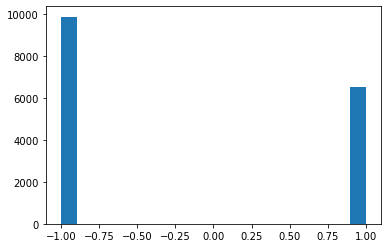

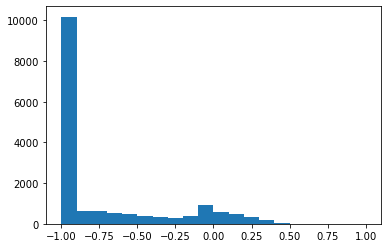

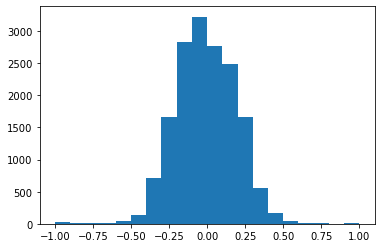

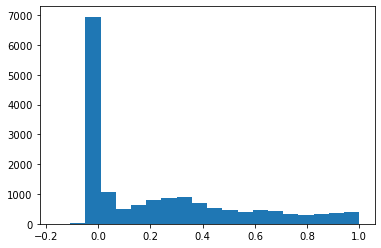

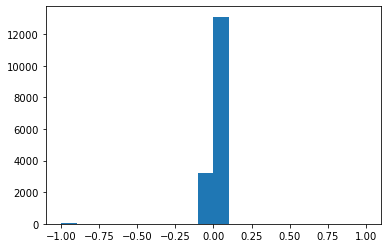

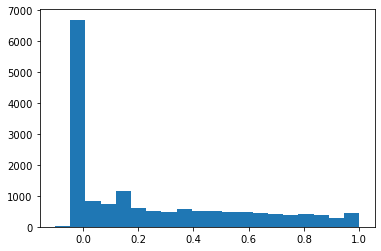

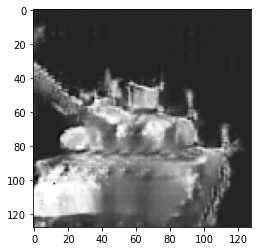

In [11]:
dataset = CycleGANDataSet('./datasets/A','./datasets/B')
dataloader = DataLoader(dataset,batch_size=1)

for real_A , real_B in dataloader:
    
    result = model.eval(real_A,real_B)
    
    pixel_analysis(real_A)
    pixel_analysis(real_B)
    pixel_analysis(result[0])
    pixel_analysis(result[1])
    pixel_analysis(result[2])
    pixel_analysis(result[3])
    
    show_tensor_image(result[1])
    
    break

        